In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import KMeans, AgglomerativeClustering

# Data Exploration

In [2]:
# Load the data
def load_data(f_p):
    """
    Load data from a CSV file.

    Args:
        f_p (str): Path to the CSV file.

    Returns:
        pandas.DataFrame: Loaded data.
    """
    return pd.read_csv(f_p)

In [3]:
file_path = r'C:\Users\ashva\Work\christ\internship\Feynn Labs\Projects\Project 2\Code\McDonalds Case Study\mcdonalds.csv'
mcdonalds_data = load_data(file_path)

In [4]:
# Display the data
def display_data(data):
    """
    Display the first few rows of the data.

    Args:
        data (pandas.DataFrame): Data to display.
    """
    print(data.head(3))

In [5]:
display_data(mcdonalds_data)

  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  


In [6]:
# Information of data
def display_data_info(data):
    """
    Display information about the data.

    Args:
        data (pandas.DataFrame): Data to display information for.
    """
    print(data.info())

In [7]:
display_data_info(mcdonalds_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB
None


In [8]:
# Get the sum of null values of each column
def display_null_values(data):
    """
    Display the sum of null values in each column of the data.

    Args:
        data (pandas.DataFrame): Data to check for null values.
    """
    print(pd.isnull(data).sum())

In [9]:
display_null_values(mcdonalds_data)

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64


In [10]:
# Get descriptive statistics
def display_descriptive_stats(data):
    """
    Display descriptive statistics of the data.

    Args:
        data (pandas.DataFrame): Data to compute descriptive statistics for.
    """
    print(data.describe())

In [11]:
display_descriptive_stats(mcdonalds_data)

               Age
count  1453.000000
mean     44.604955
std      14.221178
min      18.000000
25%      33.000000
50%      45.000000
75%      57.000000
max      71.000000


# Data Visualization

In [12]:
# Plot the count of male and female
def plot_gender_count(data):
    """
    Plot the count of male and female in the data.

    Args:
        data (pandas.DataFrame): Data containing 'Gender' column.
    """
    labels = ['Male', 'Female']
    sizes = [
        data.query('Gender == "Male"').Gender.count(),
        data.query('Gender == "Female"').Gender.count()
    ]
    c = ['#ffdaB9', '#66b3ff']
    explode = (0.05, 0.05)

    plt.figure(figsize=(8, 8))
    my_circle = plt.Circle((0, 0), 0.7, color='white')

    plt.pie(
        sizes,
        colors=c,
        labels=labels,
        autopct='%1.1f%%',
        startangle=90,
        pctdistance=0.85,
        explode=explode
    )

    p = plt.gcf()
    plt.axis('equal')
    p.gca().add_artist(my_circle)

    plt.show()

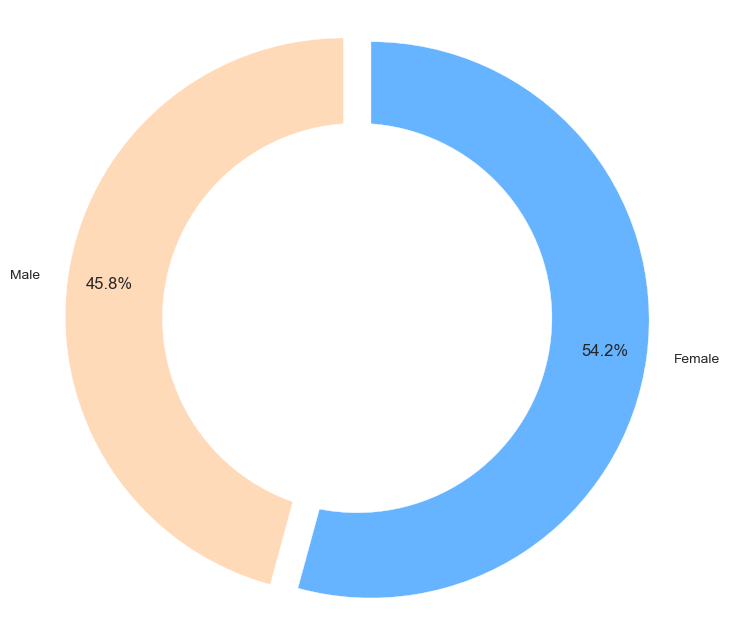

In [13]:
plot_gender_count(mcdonalds_data)

In [14]:
# Plot the count of age using Seaborn
def plot_age_count(data):
    """
    Plot the count of age using Seaborn.

    Args:
        data (pandas.DataFrame): Data containing 'Age' column.
    """
    plt.figure(figsize=(15, 10))
    sns.countplot(data=data, x='Age')

    # Set labels and title
    plt.xlabel('Age')
    plt.ylabel('Count')
    plt.title('Count of Age')

    # Display the plot
    plt.show()

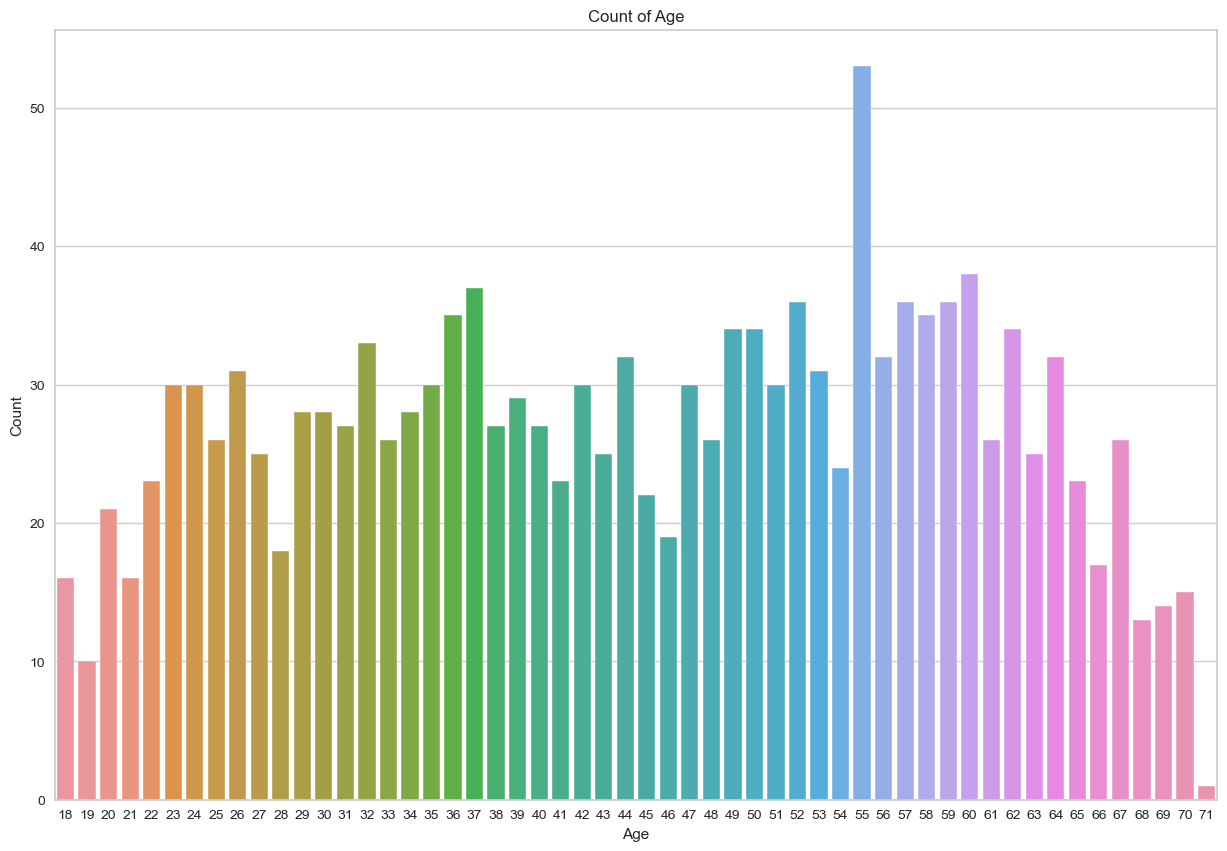

In [15]:
plot_age_count(mcdonalds_data)

# Data Preprocessing

In [16]:
# Preprocess the data
def preprocess_data(data):
    """
    Preprocess the data by converting selected columns to binary representation.

    Args:
        data (pandas.DataFrame): Data to preprocess.

    Returns:
        pandas.DataFrame: Preprocessed data.
    """
    selected_columns = data.iloc[:, 0:11]
    selected_columns = (selected_columns == "Yes").astype(int)
    return selected_columns

In [17]:
preprocessed_data = preprocess_data(mcdonalds_data)

# Dimensionality Reduction

Dimensionality reduction refers to the process of reducing the number of variables or features in a dataset while preserving its important structure and patterns. It is commonly used in machine learning and data analysis to handle high-dimensional data, where the number of variables is large compared to the number of samples. The main goal of dimensionality reduction is to simplify the data representation, remove redundant or irrelevant features, and improve computational efficiency.

In [18]:
# Perform Principal Component Analysis (PCA)
def perform_pca(data):
    """
    Perform Principal Component Analysis (PCA) on the data.

    Args:
        data (pandas.DataFrame): Data to perform PCA on.

    Returns:
        numpy.ndarray: Resulting PCA components.
    """
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)

    pca = PCA()
    pca_res = pca.fit_transform(data_scaled)

    for iteration in range(pca.n_components_):
        print(f"PC{iteration + 1}")
        print(f"Standard deviation: {np.round(np.sqrt(pca.explained_variance_[iteration]), 4)}")
        print(f"Proportion of Variance: {np.round(pca.explained_variance_ratio_[iteration], 4)}")
        print(f"Cumulative Proportion: {np.round(np.sum(pca.explained_variance_ratio_[:iteration+1]), 4)}")
        print()

    return pca_res

In [19]:
pca_result = perform_pca(preprocessed_data)

PC1
Standard deviation: 1.6772
Proportion of Variance: 0.2556
Cumulative Proportion: 0.2556

PC2
Standard deviation: 1.2779
Proportion of Variance: 0.1483
Cumulative Proportion: 0.4039

PC3
Standard deviation: 1.1752
Proportion of Variance: 0.1255
Cumulative Proportion: 0.5294

PC4
Standard deviation: 1.0401
Proportion of Variance: 0.0983
Cumulative Proportion: 0.6277

PC5
Standard deviation: 0.9586
Proportion of Variance: 0.0835
Cumulative Proportion: 0.7111

PC6
Standard deviation: 0.8846
Proportion of Variance: 0.0711
Cumulative Proportion: 0.7822

PC7
Standard deviation: 0.8458
Proportion of Variance: 0.065
Cumulative Proportion: 0.8472

PC8
Standard deviation: 0.7699
Proportion of Variance: 0.0538
Cumulative Proportion: 0.9011

PC9
Standard deviation: 0.7241
Proportion of Variance: 0.0476
Cumulative Proportion: 0.9487

PC10
Standard deviation: 0.5548
Proportion of Variance: 0.028
Cumulative Proportion: 0.9766

PC11
Standard deviation: 0.507
Proportion of Variance: 0.0234
Cumulativ

Principal Component Analysis (PCA) is a popular technique for dimensionality reduction. It transforms the original variables into a new set of uncorrelated variables called principal components. These principal components are linear combinations of the original variables and are ordered by the amount of variance they explain in the data. By selecting a subset of the most important principal components, we can effectively reduce the dimensionality of the dataset while retaining most of the information.

PCA provides several benefits, including:
- Reducing the number of variables, which can improve computational efficiency and decrease the risk of overfitting.
- Identifying the most important features that contribute the most to the variance in the data.
- Visualizing high-dimensional data in a lower-dimensional space.

# Clustering Analysis

Clustering analysis is an unsupervised learning technique used to identify natural groupings or clusters in a dataset. It aims to partition the data into subsets or clusters, where instances within the same cluster are more similar to each other than to instances in other clusters. Clustering helps uncover hidden patterns, structure, and relationships in the data without the need for predefined labels or target variables.

There are various clustering algorithms available, each with its own assumptions and characteristics. Two commonly used clustering algorithms are K-means clustering and Hierarchical clustering:

In [20]:
# Apply K-means Clustering Algorithm
def apply_kmeans_clustering(data, n_init=10):
    """
    Apply K-means Clustering Algorithm to the data.

    Args:
        data (numpy.ndarray): Data to cluster.
        n_init (int): Number of times the k-means algorithm will be run with different centroid seeds.

    Returns:
        numpy.ndarray: Cluster labels.
    """
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)

    model = KMeans(random_state=42, n_init=n_init)
    visualizer = KElbowVisualizer(model, k=(1, 11))
    visualizer.fit(data_scaled)
    visualizer.show()

    num_clusters = visualizer.elbow_value_

    kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=n_init)
    clusters = kmeans.fit_predict(data_scaled)

    sns.scatterplot(x=data_scaled[:, 0], y=data_scaled[:, 1], hue=clusters, palette='Set1')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('Scatter Plot with K-means Clusters')
    plt.show()

    return clusters

K-means Clustering: It is an iterative algorithm that aims to partition the data into K distinct clusters, where K is predefined. The algorithm starts by randomly initializing K cluster centroids and iteratively assigns each instance to the nearest centroid. Then, it updates the centroids by calculating the mean of the instances in each cluster. This process is repeated until convergence, where the centroids no longer change significantly or a maximum number of iterations is reached. K-means clustering tries to minimize the within-cluster sum of squares, aiming for compact and well-separated clusters.

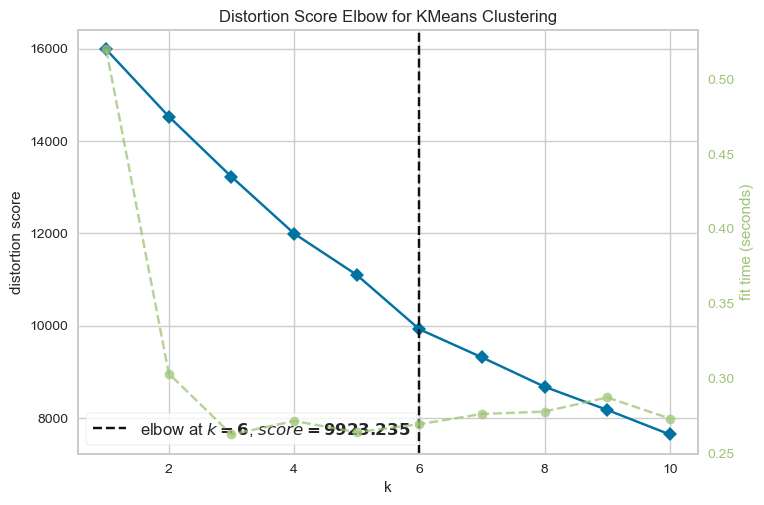

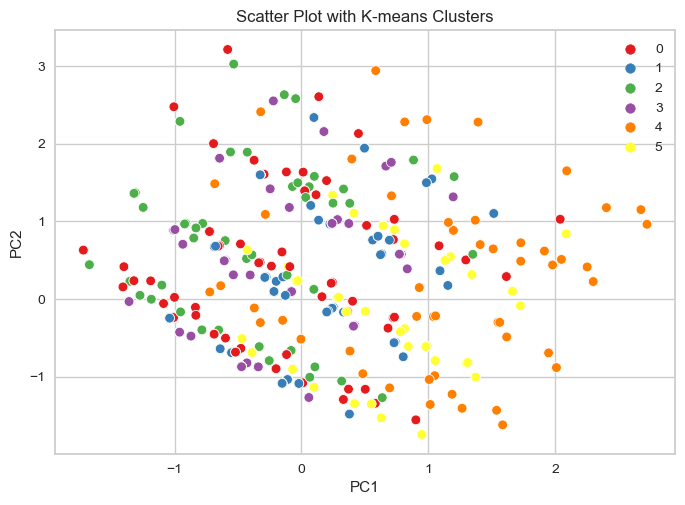

In [21]:
kmeans_clusters = apply_kmeans_clustering(pca_result)

The `KElbowVisualizer` is a visual diagnostic tool in scikit-learn that helps determine the optimal number of clusters in a K-means clustering algorithm. It uses a scoring metric called the "elbow" method to identify the point of diminishing returns in terms of the number of clusters.

The elbow method evaluates the relationship between the number of clusters (K) and the within-cluster sum of squares (WCSS). WCSS measures the compactness or homogeneity of clusters, where a lower value indicates better clustering. The idea is to find the number of clusters where the decrease in WCSS begins to level off, resembling an "elbow" shape in the plot.

Here's how the `KElbowVisualizer` works:

1. The user specifies a range of values for K, typically a sequence of integers representing different numbers of clusters to evaluate.

2. For each value of K, the `KElbowVisualizer` fits a K-means clustering algorithm to the data and computes the WCSS.

3. It plots the WCSS score for each value of K on a line plot.

4. The visualizer also computes a scoring metric, called the "distortion score," which is the negative of the WCSS value. It represents how well the data fits the K-means model.

5. The plot displays the WCSS scores as a function of K. Typically, K is plotted on the x-axis, and the WCSS scores or distortion scores are plotted on the y-axis.

6. The visualizer marks the "elbow" point on the plot, which is the point where the WCSS score starts to level off. This point indicates the optimal number of clusters, as it suggests diminishing returns in terms of improving the clustering performance with additional clusters.

The `KElbowVisualizer` provides a visual aid to determine the optimal number of clusters by identifying the elbow point in the plot. However, it's important to note that the interpretation of the elbow point is subjective and may vary based on the dataset and problem context. It is recommended to consider other factors, such as domain knowledge, business requirements, and additional evaluation metrics, when selecting the final number of clusters.

In summary, the `KElbowVisualizer` simplifies the process of finding the optimal number of clusters in K-means clustering by visually identifying the elbow point in the WCSS plot.

In [22]:
# Hierarchical Clustering Algorithm
def apply_hierarchical_clustering(data, distance_threshold=None):
    """
    Apply Hierarchical Clustering Algorithm to the data.

    Args:
        data (numpy.ndarray): Data to cluster.
        distance_threshold (float): The linkage distance threshold above which clusters will not be merged.

    Returns:
        numpy.ndarray: Cluster labels.
    """
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)

    model = AgglomerativeClustering(distance_threshold=distance_threshold, n_clusters=None)
    model.fit(data_scaled)

    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')
    dendrogram(linkage(data_scaled, method='ward'))
    plt.show()

    clusters = model.labels_

    sns.scatterplot(x=data_scaled[:, 0], y=data_scaled[:, 1], hue=clusters, palette='Set1', legend=False)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title(f'Scatter Plot with Hierarchical Clusters (Number of Clusters: {len(np.unique(clusters))})')
    plt.show()

    return clusters

Hierarchical Clustering: It is a bottom-up (agglomerative) or top-down (divisive) approach that creates a hierarchy of clusters. The algorithm starts by considering each instance as an individual cluster and then merges or splits clusters based on a similarity or distance measure between instances. The process continues until a stopping criterion is met, resulting in a tree-like structure called a dendrogram. Hierarchical clustering does not require specifying the number of clusters in advance and can capture clusters at different scales or granularities.

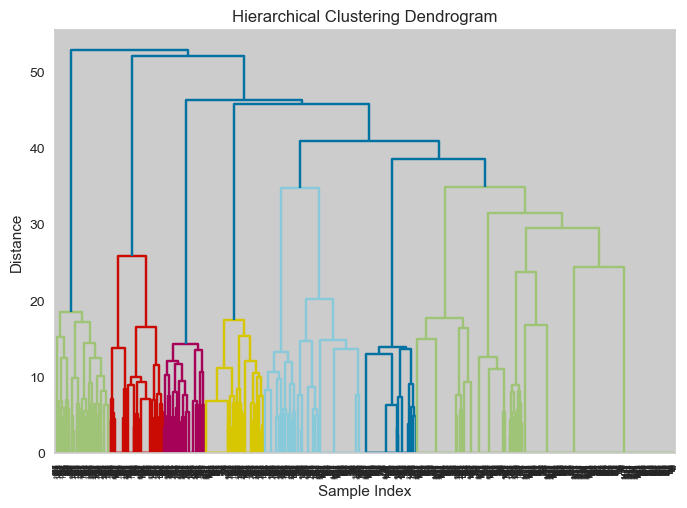

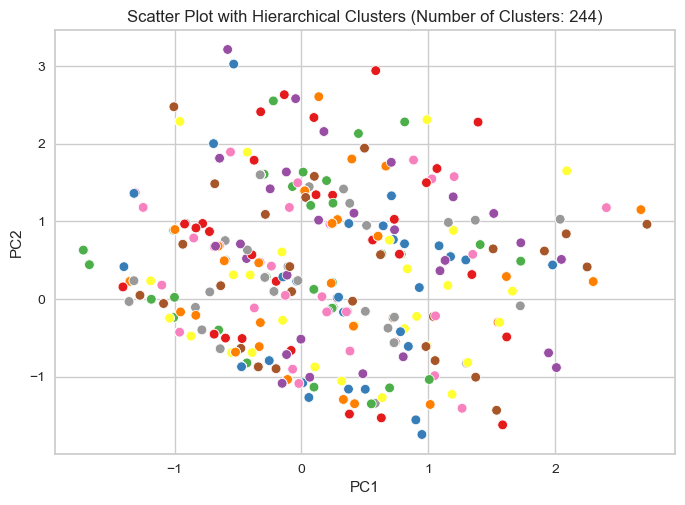

In [23]:
hierarchical_clusters = apply_hierarchical_clustering(pca_result, distance_threshold=2.5)

Clustering analysis can provide insights into the underlying structure of the data, identify homogeneous groups, and enable further analysis or decision-making based on the cluster assignments.

# Cluster Analysis

Cluster analysis, also known as cluster validation or cluster evaluation, is the process of assessing the quality and meaningfulness of the clusters obtained from a clustering algorithm. It aims to determine whether the clusters found by the algorithm are reliable, interpretable, and useful for the intended analysis or application.

In [24]:
# Analyze the clusters
def analyze_clusters(data, clusters):
    """
    Analyze the clusters by displaying cluster distribution and percentages.

    Args:
        data (pandas.DataFrame): Data with cluster labels.
        clusters (numpy.ndarray): Cluster labels.
    """
    data['Cluster'] = clusters

    cluster_counts = data['Cluster'].value_counts().sort_index()
    cluster_percentages = cluster_counts / cluster_counts.sum() * 100

    print("Cluster Distribution:")
    print(cluster_counts)
    print()
    print("Cluster Percentages:")
    print(cluster_percentages)

In [25]:
# Analyze the K-means clusters
analyze_clusters(mcdonalds_data, kmeans_clusters)

Cluster Distribution:
Cluster
0    127
1    402
2    147
3    425
4    134
5    218
Name: count, dtype: int64

Cluster Percentages:
Cluster
0     8.740537
1    27.666896
2    10.116999
3    29.249828
4     9.222299
5    15.003441
Name: count, dtype: float64


In [26]:
# Analyze the Hierarchical clusters
analyze_clusters(mcdonalds_data, hierarchical_clusters)

Cluster Distribution:
Cluster
0      2
1      2
2      2
3      2
4      2
      ..
239    1
240    1
241    1
242    1
243    1
Name: count, Length: 244, dtype: int64

Cluster Percentages:
Cluster
0      0.137646
1      0.137646
2      0.137646
3      0.137646
4      0.137646
         ...   
239    0.068823
240    0.068823
241    0.068823
242    0.068823
243    0.068823
Name: count, Length: 244, dtype: float64


Cluster analysis involves various evaluation methods and metrics to assess the quality of clusters, such as:

- Cluster Distribution: It examines the distribution of instances across clusters to understand the balance and size of each cluster. It helps identify if there are any heavily populated or underrepresented clusters.

- Cluster Separation: It measures the degree of separation or dissimilarity between clusters. It assesses how distinct the clusters are from each other and whether they capture different patterns or groups in the data.

- Internal Cluster Validation: It includes metrics such as Silhouette coefficient, Davies-Bouldin index, and Calinski-Harabasz index. These metrics evaluate the compactness, separation, and overall quality of the clusters based on the internal characteristics of the data.

- External Cluster Validation: It involves comparing the clustering results with externally known information or ground truth labels, if available. Metrics like Rand index, Fowlkes-Mallows index, and adjusted mutual information measure the agreement between the clustering and the true labels.

Cluster analysis helps in understanding the reliability of the clustering results, selecting the appropriate number of clusters, and guiding further analysis or decision-making based on the identified clusters.